In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [23]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [24]:
print(len(train_X), len(test_X))

404 102


In [25]:
print(train_X[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [26]:
print(train_Y[0])

15.2


In [27]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

In [28]:
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

In [29]:
print(test_X[0])
print(train_Y[0])

[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]
-0.7821526033779157


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

/opt/homebrew/Caskroom/miniforge/base/envs/p39t27/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 52)                728       
                                                                 
 dense_8 (Dense)             (None, 39)                2067      
                                                                 
 dense_9 (Dense)             (None, 26)                1040      
                                                                 
 dense_10 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [46]:
# callback 함수를 사용하는 경우
# history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0870 - val_loss: 0.1408
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0846 - val_loss: 0.1212
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0877 - val_loss: 0.1458
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0829 - val_loss: 0.1299
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0965 - val_loss: 0.1275


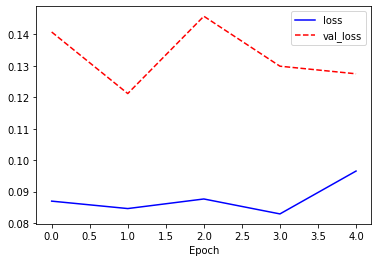

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [48]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 5ms/step - loss: 0.2755


0.27547013759613037

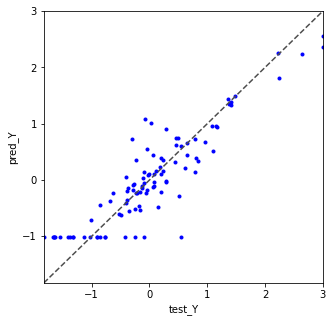

In [49]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()